### ***Fuente de la Competición: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/***

# ***Explicación del problema***

Conjunto de datos de dos ciudades y el número de **casos de infección** relacionadas con el Dengue. Se incluyen los siguientes datos.


***Datos de ciudad y fecha:***

- city: ciudad
- year: año
- week_start_date: Semana del año
- total_cases: casos totales de infección con Dengue

***Datos climáticos diarios de la estaciones del "NOAA's GHCN" (Global Historical Climatology Network daily)***

- station_max_temp_c: Máxima temperatura
- station_min_temp_c: Mínima temperatura
- station_avg_temp_c: Temperatura Media
- station_precip_mm: Precipitaciones totales
- station_diur_temp_rng_c: Rango de temperaturas diurno

***Medida de precipitaciones del satélite PERSIANN***

- precipitation_amt_mm: Precipitaciones Totales

***Medidas reanalizadas del "NOAA's NCEP" (National Centers for Environmental Prediction)***

- reanalysis_sat_precip_amt_mm: Precipitaciones totales
- reanalysis_dew_point_temp_k:  Temperatura media del punto de rocío
- reanalysis_air_temp_k: Temperatura media del aire
- reanalysis_relative_humidity_percent: Media relativa de la humedad
- reanalysis_specific_humidity_g_per_kg: Media específica de la humedad
- reanalysis_precip_amt_kg_per_m2: Precipitaciones totales por metro cuadrado
- reanalysis_max_air_temp_k: Temperatura máxima del aire
- reanalysis_min_air_temp_k: Temperatura mínima del aire
- reanalysis_avg_temp_k: Temperatura media del aire
- reanalysis_tdtr_k: Rango de temperaturas diurnas

***Medidas de los índices de vegetación normalizado del "NOAA's CDR" (Climate Data Records)***

- ndvi_se: Píxel SurEste del centro geográfico de la ciudad
- ndvi_sw: Píxel SurOeste del centro geográfico de la ciudad
- ndvi_ne: Píxel NorEste del centro geográfico de la ciudad
- ndvi_nw: Píxel NorOeste del centro geográfico de la ciudad


**Aclaración:** NDVI significa una medicion de lo "verde" en las imágenes. Oscila entre -1 y 1. 
· 1 significa totalmente verde. 
· 0 significa poco o nada verde (que podría indicar urbanismo o terrenos sin vegetación). 
· -1 significa agua.


***Los Datos ya vienen separados en 3 CSV***

- train_features.csv > Características para entrenar
- train_labels.csv > Etiquetas de entrenamiento
- test_features.csv > Características para testear

***Se requiere generar un modelo de regresión que analice y prediga el número de casos (total_cases), y se genere un archivo .csv que recoja los resultados para ser enviado a la página de la competición.***

**Este archivo será el submission_format.csv que ya nos entregan en la competición**

# ***Carga de Datos***

In [ ]:
import pandas as pd
import io

url_Train_Labels = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/dengue_labels_train.csv"
url_Train_Features = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/dengue_features_train.csv"
url_Test_Features = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/dengue_features_test.csv"

Y_Train = pd.read_csv(url_Train_Labels)
X_Train = pd.read_csv(url_Train_Features)
X_Test = pd.read_csv(url_Test_Features)

In [ ]:
X_Train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [ ]:
Y_Train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [ ]:
Y_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [ ]:
X_Test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [ ]:
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

***IMPORTACIONES***

In [ ]:
# Manipulación y visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from scipy.stats import randint as sp_randint

***Comprobar si existen datos Null, NaN o Infinite en los datos***

In [ ]:
null_check = X_Train.isnull().values.any()
nan_check = X_Train.isna().values.any()
inf_check = X_Train.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null en X_Train?:', null_check )
print('¿Hay datos Nan en X_Train?:', nan_check )
print('¿Hay datos Infinitos en X_Train?:', inf_check )

¿Hay datos Null en X_Train?: True
¿Hay datos Nan en X_Train?: True
¿Hay datos Infinitos en X_Train?: False


In [ ]:
null_check = Y_Train.isnull().values.any()
nan_check = Y_Train.isna().values.any()
inf_check = Y_Train.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null en Y_Train?:', null_check )
print('¿Hay datos Nan en Y_Train?:', nan_check )
print('¿Hay datos Infinitos en Y_Train?:', inf_check )

¿Hay datos Null en Y_Train?: False
¿Hay datos Nan en Y_Train?: False
¿Hay datos Infinitos en Y_Train?: False


In [ ]:
null_check = X_Test.isnull().values.any()
nan_check = X_Test.isna().values.any()
inf_check = X_Test.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null en test_data?:', null_check )
print('¿Hay datos Nan en test_data?:', nan_check )
print('¿Hay datos Infinitos en test_data?:', inf_check )

¿Hay datos Null en test_data?: True
¿Hay datos Nan en test_data?: True
¿Hay datos Infinitos en test_data?: False


In [ ]:
# Existen valores NaN y Null, así que rellenaremos dichos datos
X_Train.fillna(X_Train.rolling(20, min_periods=1).mean(), inplace=True)
X_Test.fillna(X_Test.rolling(20, min_periods=1).mean(), inplace=True)

<ipython-input-3-1d0798441399>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['city', 'week_start_date'], dtype='object')
  X_Train.fillna(X_Train.rolling(20, min_periods=1).mean(), inplace=True)
<ipython-input-3-1d0798441399>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['city', 'week_start_date'], dtype='object')
  X_Test.fillna(X_Test.rolling(20, min_periods=1).mean(), inplace=True)


# ***Matriz de Correlación para comprobar los datos***

<Axes: >

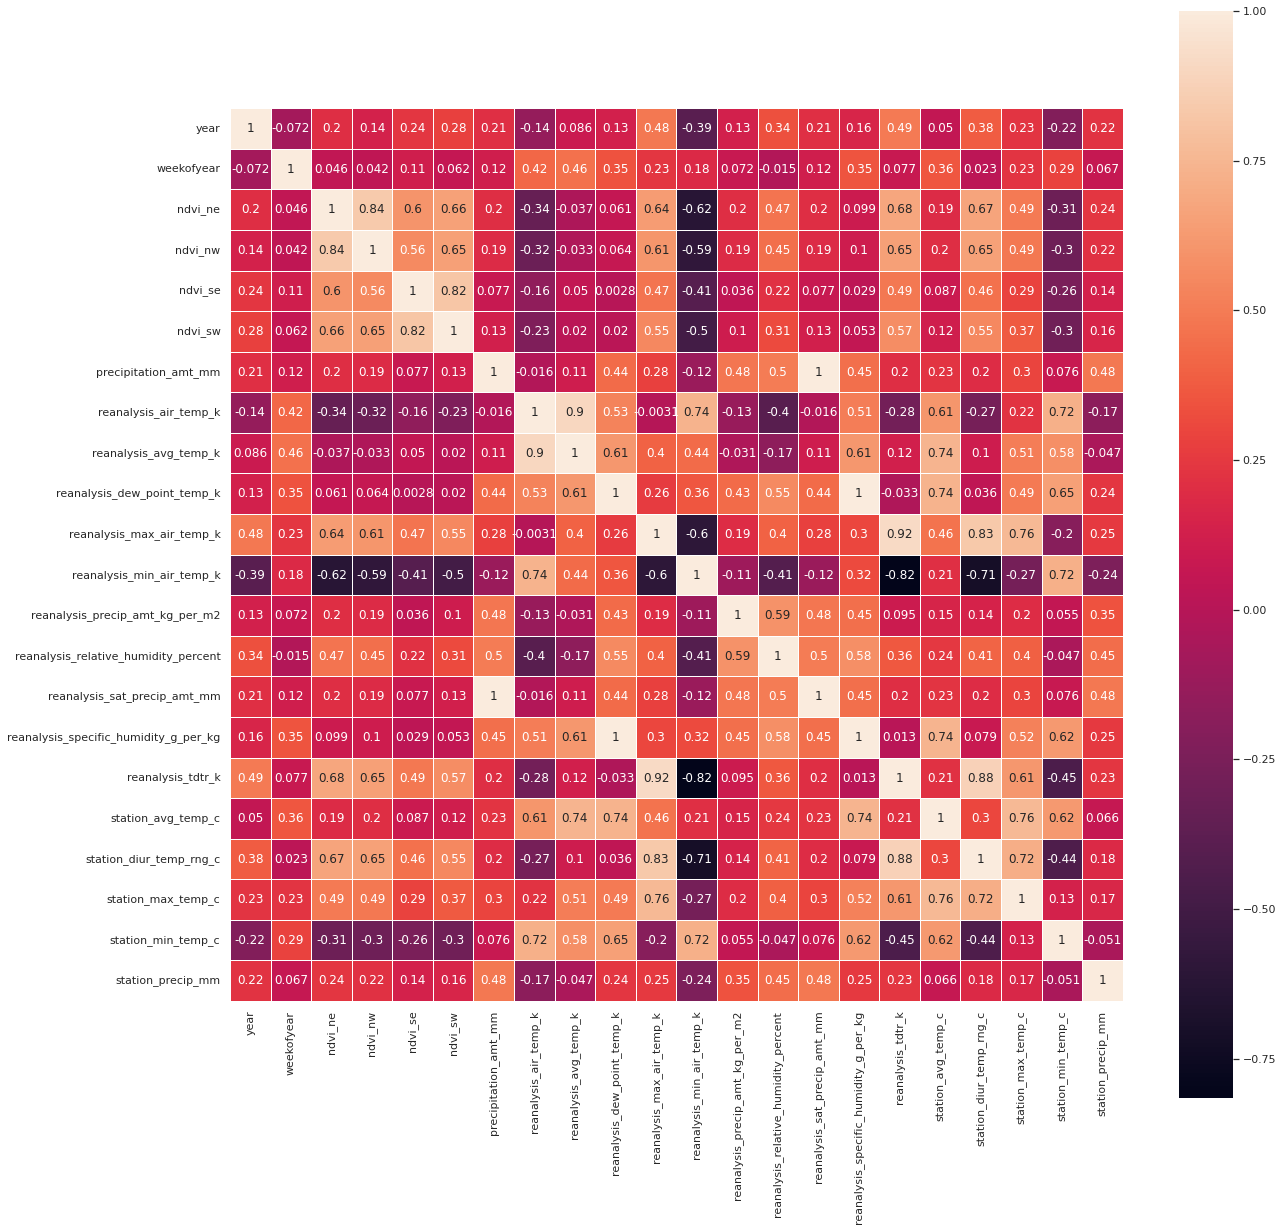

In [ ]:
# Se utiliza la librería Seaborn descargada más arriba
sns.set()
fig, ax = plt.subplots(figsize=(20,20))  # Manipular el tamaño del Mapa
sns.heatmap(X_Train.corr(), square=True, annot=True, linewidths=.5, ax=ax)

# ***Transformaciones de los Datos***

***Para esta versión, eliminaremos varias de las columnas para ajustar más el número de datos siguiendo la siguiente lógica:***

"Si queremos predecir el número de casos de infección a través de un tipo de mosquito, y los datos que se nos presentan son datos climatológicos, es propio pensar que existe una relación entre las temperaturas más bajas, altas y la humedad un número menor de casos, puesto que el mosquito no puede sobrevivir en dichas temperaturas o en entornos muy secos." 

En este pretexto, eliminaremos las tablas relacionadas con la ciudad (fechas, datos de ciudad).

> Eliminaremos las siguientes tablas de datos de ciudad:


*   city
*   week_start_date
*   weekofyear
*   year


In [ ]:
# Eliminar datos de X_Train , X_Test
X_Train.drop('city',axis=1, inplace=True)
X_Train.drop('year',axis=1, inplace=True)
X_Train.drop('week_start_date',axis=1, inplace=True)
X_Train.drop('weekofyear',axis=1, inplace=True)

X_Test.drop('city',axis=1, inplace=True)
X_Test.drop('year',axis=1, inplace=True)
X_Test.drop('week_start_date',axis=1, inplace=True)
X_Test.drop('weekofyear',axis=1, inplace=True)

### ***Plantearemos reescalar nuestros datos.***

Nota: No truncar los valores.

Hay algunos de nuestros datos con valores muy grandes, de modo que realizaremos un escalamiento MinMax o Standard.

In [ ]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ndvi_ne                                1456 non-null   float64
 1   ndvi_nw                                1456 non-null   float64
 2   ndvi_se                                1456 non-null   float64
 3   ndvi_sw                                1456 non-null   float64
 4   precipitation_amt_mm                   1456 non-null   float64
 5   reanalysis_air_temp_k                  1456 non-null   float64
 6   reanalysis_avg_temp_k                  1456 non-null   float64
 7   reanalysis_dew_point_temp_k            1456 non-null   float64
 8   reanalysis_max_air_temp_k              1456 non-null   float64
 9   reanalysis_min_air_temp_k              1456 non-null   float64
 10  reanalysis_precip_amt_kg_per_m2        1456 non-null   float64
 11  rean

In [ ]:
for columna in X_Train.columns:
  print(f"Columna: {columna}")
  print(f"Valor Mínimo: {min(X_Train[columna])} / Valor Máximo: {max(X_Train[columna])}")
  print("")

Columna: ndvi_ne
Valor Mínimo: -0.40625 / Valor Máximo: 0.5083571

Columna: ndvi_nw
Valor Mínimo: -0.4561 / Valor Máximo: 0.4544286

Columna: ndvi_se
Valor Mínimo: -0.01553333 / Valor Máximo: 0.5383143

Columna: ndvi_sw
Valor Mínimo: -0.06345714 / Valor Máximo: 0.5460167

Columna: precipitation_amt_mm
Valor Mínimo: 0.0 / Valor Máximo: 390.6

Columna: reanalysis_air_temp_k
Valor Mínimo: 294.635714286 / Valor Máximo: 302.2

Columna: reanalysis_avg_temp_k
Valor Mínimo: 294.892857143 / Valor Máximo: 302.928571429

Columna: reanalysis_dew_point_temp_k
Valor Mínimo: 289.642857143 / Valor Máximo: 298.45

Columna: reanalysis_max_air_temp_k
Valor Mínimo: 297.8 / Valor Máximo: 314.0

Columna: reanalysis_min_air_temp_k
Valor Mínimo: 286.9 / Valor Máximo: 299.9

Columna: reanalysis_precip_amt_kg_per_m2
Valor Mínimo: 0.0 / Valor Máximo: 570.5

Columna: reanalysis_relative_humidity_percent
Valor Mínimo: 57.7871428571 / Valor Máximo: 98.61

Columna: reanalysis_sat_precip_amt_mm
Valor Mínimo: 0.0 / Va

***Escalamiento de Datos***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Creamos un objeto para el escalamiento de datos
# scaler = MinMaxScaler()
scaler = StandardScaler()

columnas = ['precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
            'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2',
            'reanalysis_sat_precip_amt_mm','station_precip_mm']

# Escalamos los valores de la columna
for columna in columnas:
  X_Train[columna] = scaler.fit_transform(X_Train[[columna]])
  X_Test[columna] = scaler.fit_transform(X_Test[[columna]])

# ***Segunda matriz de correlación de datos***

<Axes: >

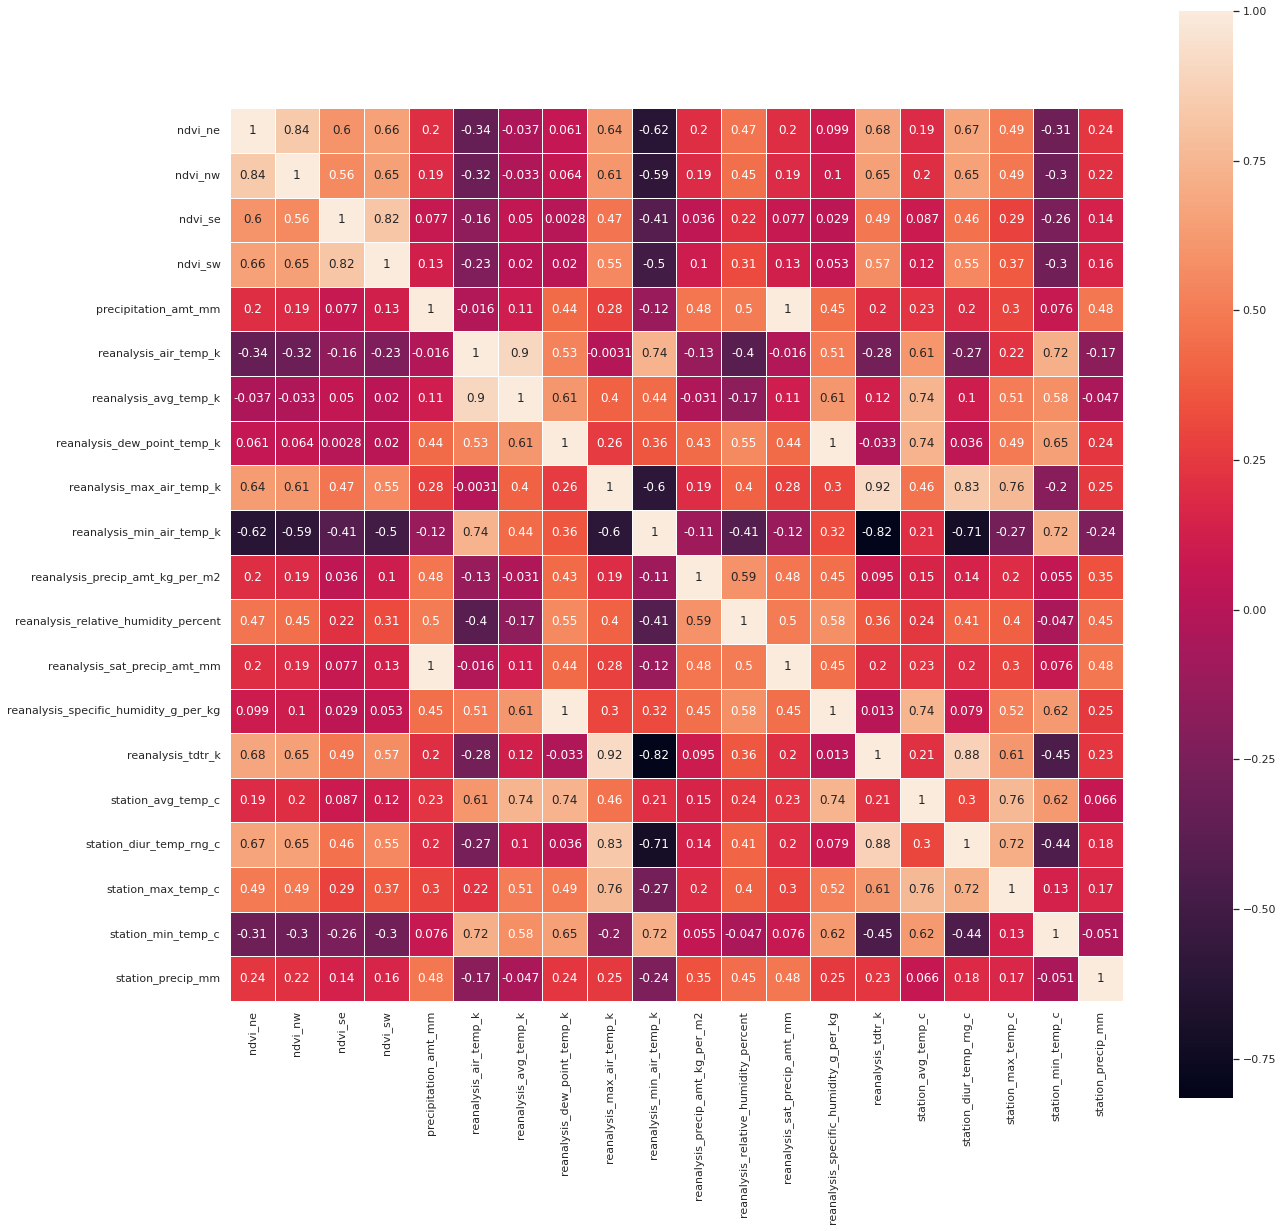

In [ ]:
# Se utiliza la librería Seaborn descargada más arriba
sns.set()
fig, ax = plt.subplots(figsize=(20,20))  # Manipular el tamaño del Mapa
sns.heatmap(X_Train.corr(), square=True, annot=True, linewidths=.5, ax=ax)

# ***Preparación del Modelo de Entrenamiento***

In [ ]:
# Separamos datos de entrada y salida
Y_Train = Y_Train['total_cases']

# Separamos en Train y Test los datos en un porcentaje del 25% para los tipo Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Train, Y_Train, test_size=0.2)

# ***Selección del Modelo: RandomForestRegressor con GridSearch y TimesSeriesSPlit (Cross Validation)***


El GridSearch es una técnica utilizada para encontrar la mejor combinación de hiperparámetros para un modelo de machine learning. La utilizaremos para mejorar los parámetros de nuestro modelo de regresion.

In [ ]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

***Diccionario de parámetros del árbol de regresión.***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": [None, 'sqrt','log2'], # Number of features (características) when looking for the best split (división)
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf(hoja) node
              "bootstrap": [True, False] # Method of selecting for training each tree, If False, the whole dataset is used to build each tree.
            }

***Obtención del número de combinaciones de parámetros a ejecutar***

In [ ]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 486


***Entrenamiento del modelo con GridSearch para su optimización.***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)
regressor = RandomForestRegressor() 
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = tscv)

# Fit the random search model
grid_regres.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

***Obtener el tipo de "Scoring"***

In [ ]:
# Si no se especifica un valor para scoring, por defecto se utiliza 
# la métrica "accuracy" para problemas de clasificación 
# y "r2" para problemas de regresión.

scoring_type = grid_regres.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}')


El tipo de scoring utilizado en GridSearchCV es None


In [ ]:
report(grid_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.197 (std: 0.059)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 64}

Model with rank: 2
Mean validation score: 0.190 (std: 0.057)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 128}

Model with rank: 3
Mean validation score: 0.189 (std: 0.064)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 128}

Model with rank: 4
Mean validation score: 0.189 (std: 0.065)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 128}

Model with rank: 5
Mean validation score: 0.187 (std: 0.059)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estim

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_leaf=8, n_estimators=64)

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit(x_train, y_train)
y_pred = best_grid.predict(x_test)

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)

MAE 16.049537187204876


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


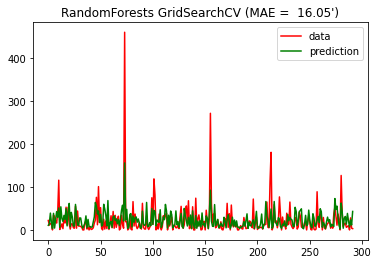

In [ ]:
from sklearn.metrics import mean_absolute_error            
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

Text(0.5, 1.0, 'GridSearchCV(RandomForestRegressor()) ( MAE =  16.05)')

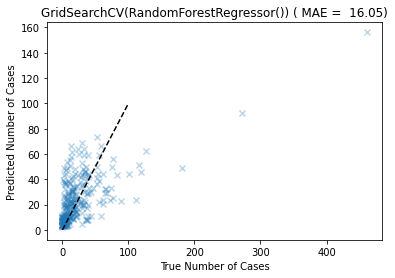

In [ ]:
plt.scatter(y_test.to_numpy(int), y_pred, alpha=0.3, marker='x')
plt.plot([0, 100], [0, 100], "--k")
plt.axis("tight")
plt.xlabel("True Number of Cases")
plt.ylabel("Predicted Number of Cases")
plt.title("GridSearchCV(RandomForestRegressor()) ( MAE = %6.2f)" % ( mae))

In [ ]:
features = list(x_train.columns)

# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': (features),
              'Random Forest': best_grid.feature_importances_})

Feature Relevancies


,Attributes,Random Forest
0,ndvi_ne,0.113538
1,ndvi_nw,0.114378
2,ndvi_se,0.058232
3,ndvi_sw,0.060469
4,precipitation_amt_mm,0.009818
5,reanalysis_air_temp_k,0.028510
6,reanalysis_avg_temp_k,0.019790
7,reanalysis_dew_point_temp_k,0.073673
8,reanalysis_max_air_temp_k,0.048296
9,reanalysis_min_air_temp_k,0.088139


### ***Selección de Modelo con los mejores parámetros y fase de entrenamiento y predicciones***

In [ ]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit(X_Train, Y_Train)
Y_Pred = best_grid.predict(X_Test)

In [ ]:
print(f"Predicciones: {Y_Pred.astype(int)}")

Predicciones: [15 15 22 16 21 26 23 47 24 71 33 26 33 24 35 34 39 52 80 46 44 46 52 27
 37 34 24 28 36 38 35 19 19 22 13 33 11 23 15 28 13 23 14 18 14 19 15 11
 18 16 14 15 25 17 29 32 32 27 29 24 33 29 96 36 35 58 33 38 35 48 57 36
 40 28 55 58 39 36 48 30 27 40 23 35 26 40 16 32 27 15 40 31 24 21 18 17
 40 18 14 20 23 15 14 23 29 33 24 60 29 79 64 39 44 44 54 66 45 44 39 64
 60 71 79 50 58 44 34 46 41 33 35 61 30 17 18 20 19 18 13 19 22 23 21 18
 16 17 15 15 14 12 13 16 17 24 20 17 11 25 13 29 35 35 34 81 58 44 43 47
 31 52 32 61 48 67 39 32 53 31 45 44 29 25 19 36 24 26 38 35 32 44 23 19
 31 22 14 23 15 17 12 17 11 13 14 14 27 20 19 26 11 28 33 26 28 20 29 23
 41 40 30 32 29 41 35 40 44 44 32 33 34 31 38 55 29 50 31 43 30 49 28 24
 29 23 16 21 21 15 13 21 16 19 11 10 14 18 12 16 21 17 24 19  8  5  9  5
  3  4  3  4  4  8  8  5  9  5  7  6 10  9 10  8  8 10 10 10 10 10  4  9
  6  6  4  6  9 10 10 10  9 12 10 10  9  9  7 10 10  3  6  6  5  4  5  3
  4  4  2  2  2  3  4  3  3  3  4  7 

# ***Selección de Modelo: GradientBoostingRegressor con RandomSearch y TimesSeriesSplit (Cross Validation)***

A continuación utilizaremos un modelo de potenciación del gradiente para resolver este problema de regresión, utilizando GridSearch para encontrar los mejores hiperparámetros y validación cruzada para mejorar la fiabilidad de predicción del modelo cruzando los datos.

***Selección de los mejores parámetros de GradientBoostingRegressor con GridSearch***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

regressor = GradientBoostingRegressor()

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
 "max_features": [None, 'sqrt','log2'],
 "loss" : ['absolute_error', 'huber', 'quantile'],
 "criterion": ['squared_error', 'friedman_mse']
 }

In [ ]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 270


In [ ]:
# Validación cruzada en saltos de 5 para entrenar el modelo
tscv = TimeSeriesSplit(n_splits=5)
random_test=sp_randint(2, 50)

rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, n_iter = 100, cv = tscv, random_state=0, n_jobs = -1)


***Entrenamos el modelo con el conjunto de modelos parametrizados para obtener el que mejores resultados obtenga.***

In [ ]:
# Entrenamiento del modelo
rnd_regres.fit(x_train, y_train)

# Obtenemos el método de scoring
scoring_type = rnd_regres.scoring
print(f'El tipo de scoring utilizado es {scoring_type}')

# Obtenemos el mejor estimador de hiperparámetros para nuestro modelo
best_random = rnd_regres.best_estimator_
print(f"Mejor Estimador: {best_random}")

El tipo de scoring utilizado es None
Mejor Estimador: GradientBoostingRegressor(criterion='squared_error', learning_rate=0.25,
                          loss='huber', max_features='log2', n_estimators=32)


In [ ]:
# Obtenemos el reporte de las mejores combinaciones de parametrización
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.143 (std: 0.056)
Parameters: {'n_estimators': 32, 'max_features': 'log2', 'loss': 'huber', 'learning_rate': 0.25, 'criterion': 'squared_error'}

Model with rank: 2
Mean validation score: 0.114 (std: 0.058)
Parameters: {'n_estimators': 128, 'max_features': 'sqrt', 'loss': 'huber', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}

Model with rank: 3
Mean validation score: 0.110 (std: 0.061)
Parameters: {'n_estimators': 128, 'max_features': 'log2', 'loss': 'huber', 'learning_rate': 0.05, 'criterion': 'squared_error'}

Model with rank: 4
Mean validation score: 0.108 (std: 0.058)
Parameters: {'n_estimators': 32, 'max_features': 'sqrt', 'loss': 'huber', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}

Model with rank: 5
Mean validation score: 0.108 (std: 0.049)
Parameters: {'n_estimators': 128, 'max_features': 'log2', 'loss': 'huber', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}



***Entrenamos el modelo con mejor parametrización***

In [ ]:
# Utilizamos el modelo con los mejores parámetros para entrenar
# y predecir con los datos de test
best_random.fit(X_Train, Y_Train)
Y_Pred = best_random.predict(X_Test)

y_pred = best_random.predict(x_test)
# Evaluación del modelo 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print (f'MAE:  {mae}')

MAE:  12.916457063649837


***Revisamos los resultados***

In [ ]:
print(f"Predicciones: {Y_Pred.astype(int)}")

Predicciones: [ 8 10 23 19 19 10 17 15 18 27 27 17 28 20 29 22 19 29 41 29 37 27 24 23
 26 15 27 18 29 23 25 20 20 13 10 20  7 21 11 21 13 26 20 17 13 11 11  8
 31 16 12  9 20 19 22 21 19 15 20 19 21 22 23 27 20 29 30 35 63 28 22 18
 20 19 66 79 97 20 25 13 21 20 15 26 21 28 20 20 22 15 20 14 27 18 17 10
 15 16  4 17 19  9  9 14 13 18 15 28 25 32 32 38 34 30 29 33 29 29 28 39
 41 51 57 34 45 29 23 31 31 32 37 17 34 11 15 20 26  7  9 10 23 16 12 15
 15 19 11 13 12  7  6 14 14 20 19 17  5 19 11 27 28 25 27 81 44 39 37 35
 25 94 27 88 31 82 23 38 50 22 38 29 33 25 19 29 26 28 25 21 16 23 16 18
 24 17 16 24 12 17  8 20 10 10 13 11 22 15 10 11  8 20 19 22 18 18 21 25
 29 27 19 29 25 28 33 36 26 36 29 43 34 24 43 32 26 46 31 30 33 25 30 21
 27  7 12 14 16 13 12 20 14 16 10 10 12 20 10  7  7 14 31 16  6  4  9  5
  4  5  6  4  3  7  6  5 17  4 43  7  7 11 12  7  8  8 11  9  9  6 15  8
  7  5  5  6  8  9 13 10  8  8  9 10  8  7  6 10  8  2 10  5  6  2 16  2
  3  3  0  2  1  3  3  2  2  2  4  7 

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


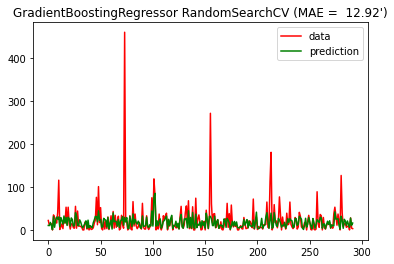

In [ ]:
from sklearn.metrics import mean_absolute_error            
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("GradientBoostingRegressor RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

Text(0.5, 1.0, 'GridSearchCV(GradientBoostingRegressor()) ( MAE =  12.92)')

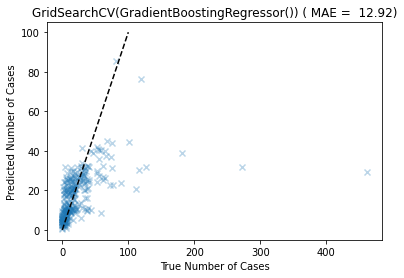

In [ ]:
plt.scatter(y_test.to_numpy(int), y_pred, alpha=0.3, marker='x')
plt.plot([0, 100], [0, 100], "--k")
plt.axis("tight")
plt.xlabel("True Number of Cases")
plt.ylabel("Predicted Number of Cases")
plt.title("GridSearchCV(GradientBoostingRegressor()) ( MAE = %6.2f)" % ( mae))

In [ ]:
features = list(x_train.columns)

# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': (features),
              'GradientBoostingRegressor Forest': best_random.feature_importances_})

Feature Relevancies


,Attributes,GradientBoostingRegressor Forest
0,ndvi_ne,0.068724
1,ndvi_nw,0.037240
2,ndvi_se,0.022271
3,ndvi_sw,0.023013
4,precipitation_amt_mm,0.016342
5,reanalysis_air_temp_k,0.090207
6,reanalysis_avg_temp_k,0.012076
7,reanalysis_dew_point_temp_k,0.037344
8,reanalysis_max_air_temp_k,0.024834
9,reanalysis_min_air_temp_k,0.115623


# ***Selección de Modelo: Modelo de Regresión Lineal Polinómico con GridSearch y KFold (Cross Validation)***

La regresión polinómica es similar a la regresión lineal, pero permite modelar relaciones no lineales entre las variables. Si la relación entre las variables independientes y la variable dependiente no es lineal, la regresión polinómica podría ser una buena opción para probar a entrenar nuestros datos.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error

# Parametrización del modelo
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(x_train)

# Modelo de regresión Polinómica
reg_poly = LinearRegression()

# Hiperparámetros a ajustar
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2],
}

# Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Valoración de los modelos de entrenamiento
scores = cross_val_score(reg_poly, x_train, y_train, cv=cv)
print(f'Scores: {scores.round(3)}')
print(f'Media: {scores.mean().round(3)}')

# búsqueda exhaustiva en el espacio de hiperparámetros
grid_search = GridSearchCV(reg_poly, param_grid=param_grid, cv= cv)
grid_search.fit(X_poly, y_train)

# imprimir los mejores parámetros y el mejor score
print('Mejores parámetros: ', grid_search.best_params_)
print('Mejor score: ', grid_search.best_score_)

Scores: [0.041 0.142 0.126 0.12  0.117]
Media: 0.109
Mejores parámetros:  {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}
Mejor score:  -0.16566593666184756


Tomamos el mejor modelo parametrizado

In [ ]:
best_gb = grid_search.best_estimator_

***Entrenamiento del Modelo con mejor parametrización y generación de predicciones***

In [ ]:
best_gb.fit(X_Train, Y_Train)

# Obtenemos la predicción y el valor del error con nuestros datos
y_pred = best_gb.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

# Realizamos las predicciones para los datos de Test reales
Y_Pred = best_gb.predict(X_Test)

print(f'MAE: {mae}')
print(f'Predicciones: {Y_Pred.astype(int)}')

MAE: 17.314393778718756
Predicciones: [ 31  28  32  36  43  39  36  46  47  45  35  39  58  43  44  53  53  48
  53  76  49  44  50  45  47  36  41  40  36  36  34  30  24  27  18  42
  14  20  24  22  21  23  25  24  13  26  14  14  22  20  21  29  30  27
  31  27  31  43  41  42  41  42  50  46  46  53  43  49  44  49  51  48
  55  50  49  49  52  39  44  35  29  37  38  38  31  38  32  43  28  27
  30  27  24  28  23  31  34  37  28  29  28  32  25  35  41  44  34  42
  40  53  44  44  47  41  45  51  46  43  42  58  46  56  56  62  48  52
  49  48  55  46  38  50  47  35  28  27  19  21  28  24  19  24  18  19
  18  21  14  17  16   9  15  21  23  30  24  23  13  29  25  41  37  39
  38  56  49  50  42  48  47  46  42  45  53  54  45  48  58  44  46  47
  46  40  36  38  38  39  36  30  20  29  27  28  27  21  21  17  17  16
  16  17  19  20  20  16  20  28  30  43  32  38  33  35  34  32  40  44
  46  47  47  45  43  41  46  47  47  50  36  43  44  42  49  51  45  52
  49  44  45 

Text(0.5, 1.0, 'GridSearchCV(GradientBoostingRegressor()) ( MAE =  17.31)')

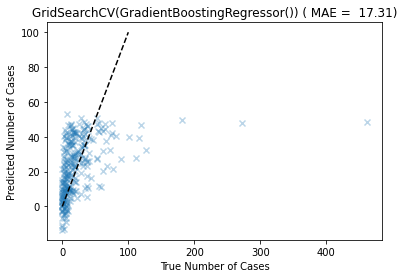

In [ ]:
plt.scatter(y_test.to_numpy(int), y_pred, alpha=0.3, marker='x')
plt.plot([0, 100], [0, 100], "--k")
plt.axis("tight")
plt.xlabel("True Number of Cases")
plt.ylabel("Predicted Number of Cases")
plt.title("GridSearchCV(GradientBoostingRegressor()) ( MAE = %6.2f)" % ( mae))

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


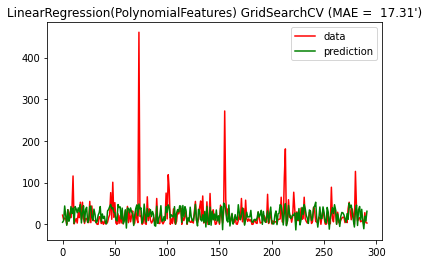

In [ ]:
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("LinearRegression(PolynomialFeatures) GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

# ***Añadir los Resultados al CSV a enviar a la competición***

In [ ]:
from google.colab import files
url_submission_format = "https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_DengAI/submission_format.csv"

  
results = pd.read_csv(url_submission_format)
results['total_cases'] = Y_Pred.astype(int)

results.to_csv('Dengue_Results.csv', index=False)
files.download('Dengue_Results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Resultados y observaciones***

***Resultados de clasificación para el modelo RandomForestRegressor***

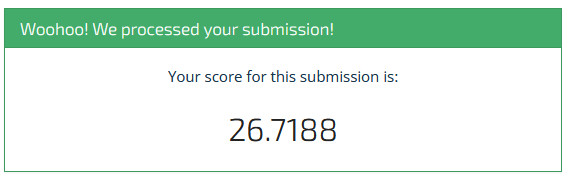

***Resultados de clasificación para el modelo GradientBoostRegressor***

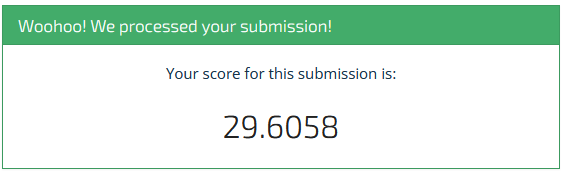

***Resultados de clasificación para el modelo Linear***

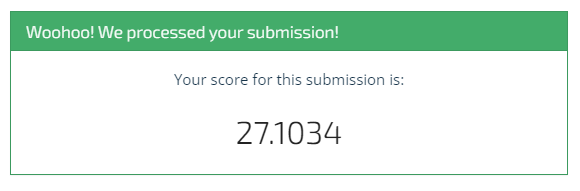

***Mejores resultados de la competición para esta versión:***

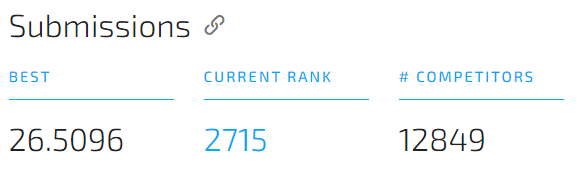

## ***Observaciones***

Podemos concluir que a través de la parametrización exhaustiva con el GridSearchCV y RandomSearchCV y el uso de modelos de árboles hemos obtenido mejores resultados que en nuestra primera versión, posiblemente tratar mejor las transformaciones de los datos puede ayudar a mejorar y reducir aún más el eeror.